In [103]:
!python -m pip install multiple-hypothesis-testing


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [104]:
try:
    from google.colab import drive
    drive.mount('/content/gdrive/')
    # import glob; print(glob.glob('/content/gdrive/Othercomputers/My Laptop/projects/RUNI/Thesis/*'))
    import sys
    sys.path.append('/content/gdrive/Othercomputers/My Laptop/projects/RUNI/Thesis')
except:
    pass

In [105]:
from Higher_Criticism import Higher_Criticism
from Higher_Analysis import Monte_carlo_Confusion_Matrices
from Synthetic_Data_Generators import Multi_Class_Normal_Population as Data_Generator
from Synthetic_Data_Generators import Two_Lists_Tuple


In [106]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'monospace'


In [107]:
N = 1000
monte_carlo = 1000
chunk_size = 100
epsilon = 0.05
tau_range = list(np.linspace(1,3,7))
gamma = 0.1



In [108]:
params_list = Data_Generator.params_dicts_from_list_donoho_N_epsilon_tau(N_range=[N], epsilon_range=[epsilon], tau_range=tau_range)
signal_generators = [Data_Generator(**params) for params in params_list]
hc_models = [Higher_Criticism(work_mode='hc', global_max=True, gamma=gamma),\
             Higher_Criticism(work_mode='bh', alpha=0.05),\
             Higher_Criticism(work_mode='bh', alpha=0.01),\
             Higher_Criticism(work_mode='bonferroni', alpha=0.05)]

model_colors = ['black', 'blue', 'red', 'green']

In [109]:

confusion_matrices = Monte_carlo_Confusion_Matrices(\
    hc_models=hc_models, signal_generators=signal_generators,\
    monte_carlo=monte_carlo, chunk_size=chunk_size)


100%|██████████| 10/10 [00:01<00:00,  5.87it/s]


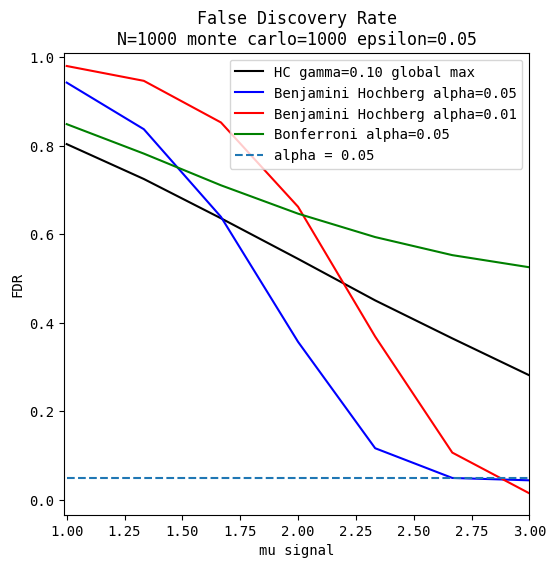

In [110]:
fdr_all = confusion_matrices.apply_mean_false_disovery_rate()
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_title(f'False Discovery Rate\nN={N} monte carlo={monte_carlo} epsilon={epsilon:.2f}')
for ind_model, hc_model in enumerate(hc_models):
    ax.plot(tau_range, fdr_all[ind_model], label=str(hc_model), color=model_colors[ind_model])
ax.hlines(y=0.05, xmin=1, xmax=3, linestyle='dashed', label='alpha = 0.05')
ax.set_xlabel('mu signal')
ax.set_ylabel('FDR')
ax.set_ylim(top=1.01)
ax.set_xlim(left=0.99, right=np.max(tau_range))
ax.legend()
plt.show()



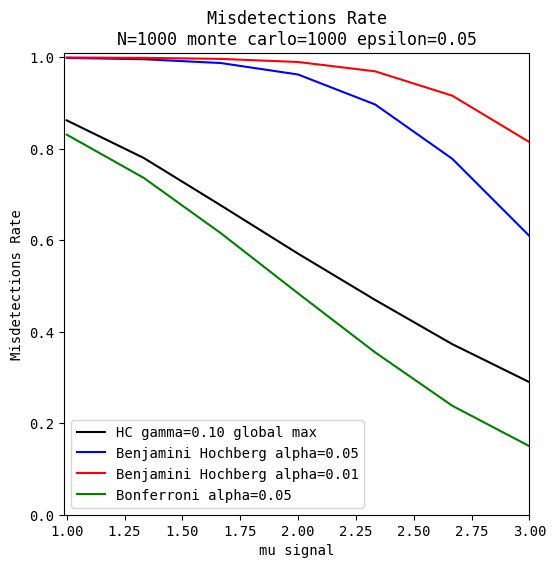

In [111]:
mdr_all = confusion_matrices.apply_mean_misdetection_rate()
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_title(f'Misdetections Rate\nN={N} monte carlo={monte_carlo} epsilon={epsilon:.2f}')
for ind_model, hc_model in enumerate(hc_models):
    ax.plot(tau_range, mdr_all[ind_model], label=str(hc_model), color=model_colors[ind_model])
ax.set_xlabel('mu signal')
ax.set_ylabel('Misdetections Rate')
ax.set_ylim(top=1.01, bottom=0)
ax.set_xlim(left=0.99, right=np.max(tau_range))
ax.legend()
plt.show()



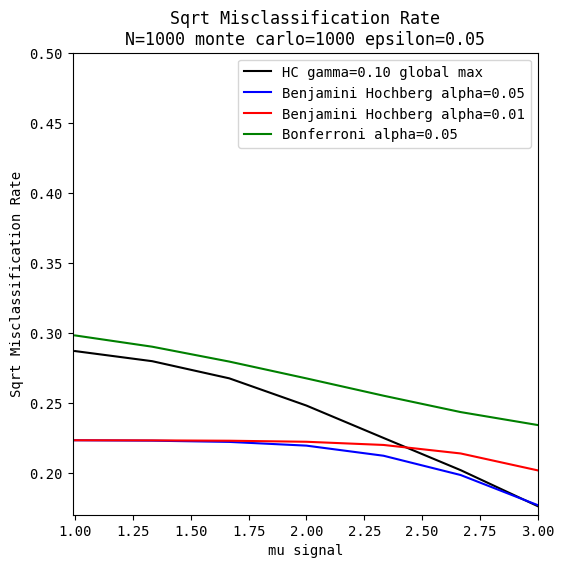

In [112]:
mcr_all = confusion_matrices.apply_mean_sqrt_misclassification_rate()
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_title(f'Sqrt Misclassification Rate\nN={N} monte carlo={monte_carlo} epsilon={epsilon:.2f}')
for ind_model, hc_model in enumerate(hc_models):
    ax.plot(tau_range, mcr_all[ind_model], label=str(hc_model), color=model_colors[ind_model])
ax.set_xlabel('mu signal')
ax.set_ylabel('Sqrt Misclassification Rate')
ax.set_ylim(top=0.5)
ax.set_xlim(left=0.99, right=np.max(tau_range))
ax.legend()
plt.show()

